In [93]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from pylab import rcParams

# Import Model Selection and Machine Learning Algorithms
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [39]:
%matplotlib inline
rcParams['figure.figsize'] = 20, 15
sns.set_style('whitegrid')

In [40]:
# import data
cars = pd.read_csv('CarPrice_Assignment.csv')
cars.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [41]:
cars.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [42]:
objects = cars.select_dtypes('object')
objects.head(5)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [43]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


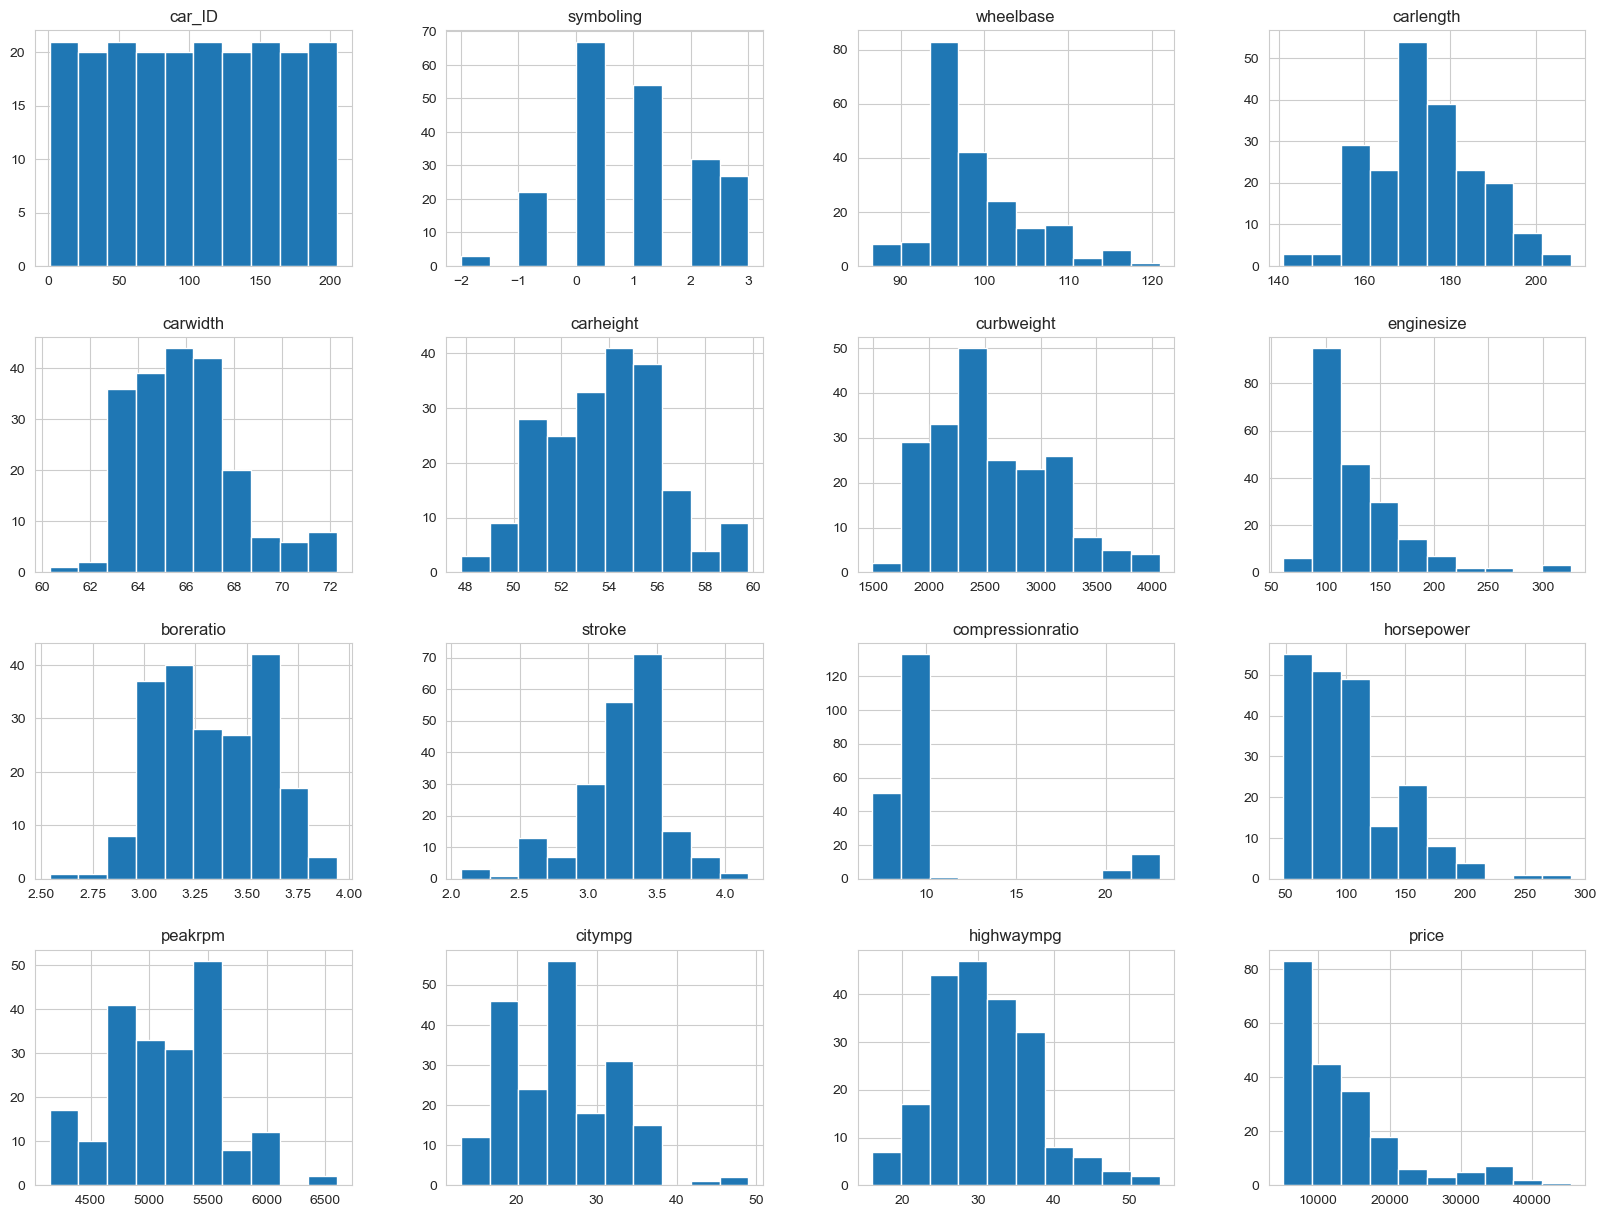

In [44]:
cars.hist(bins=10, figsize=(20, 15))
plt.show()

Text(0, 0.5, 'Count')

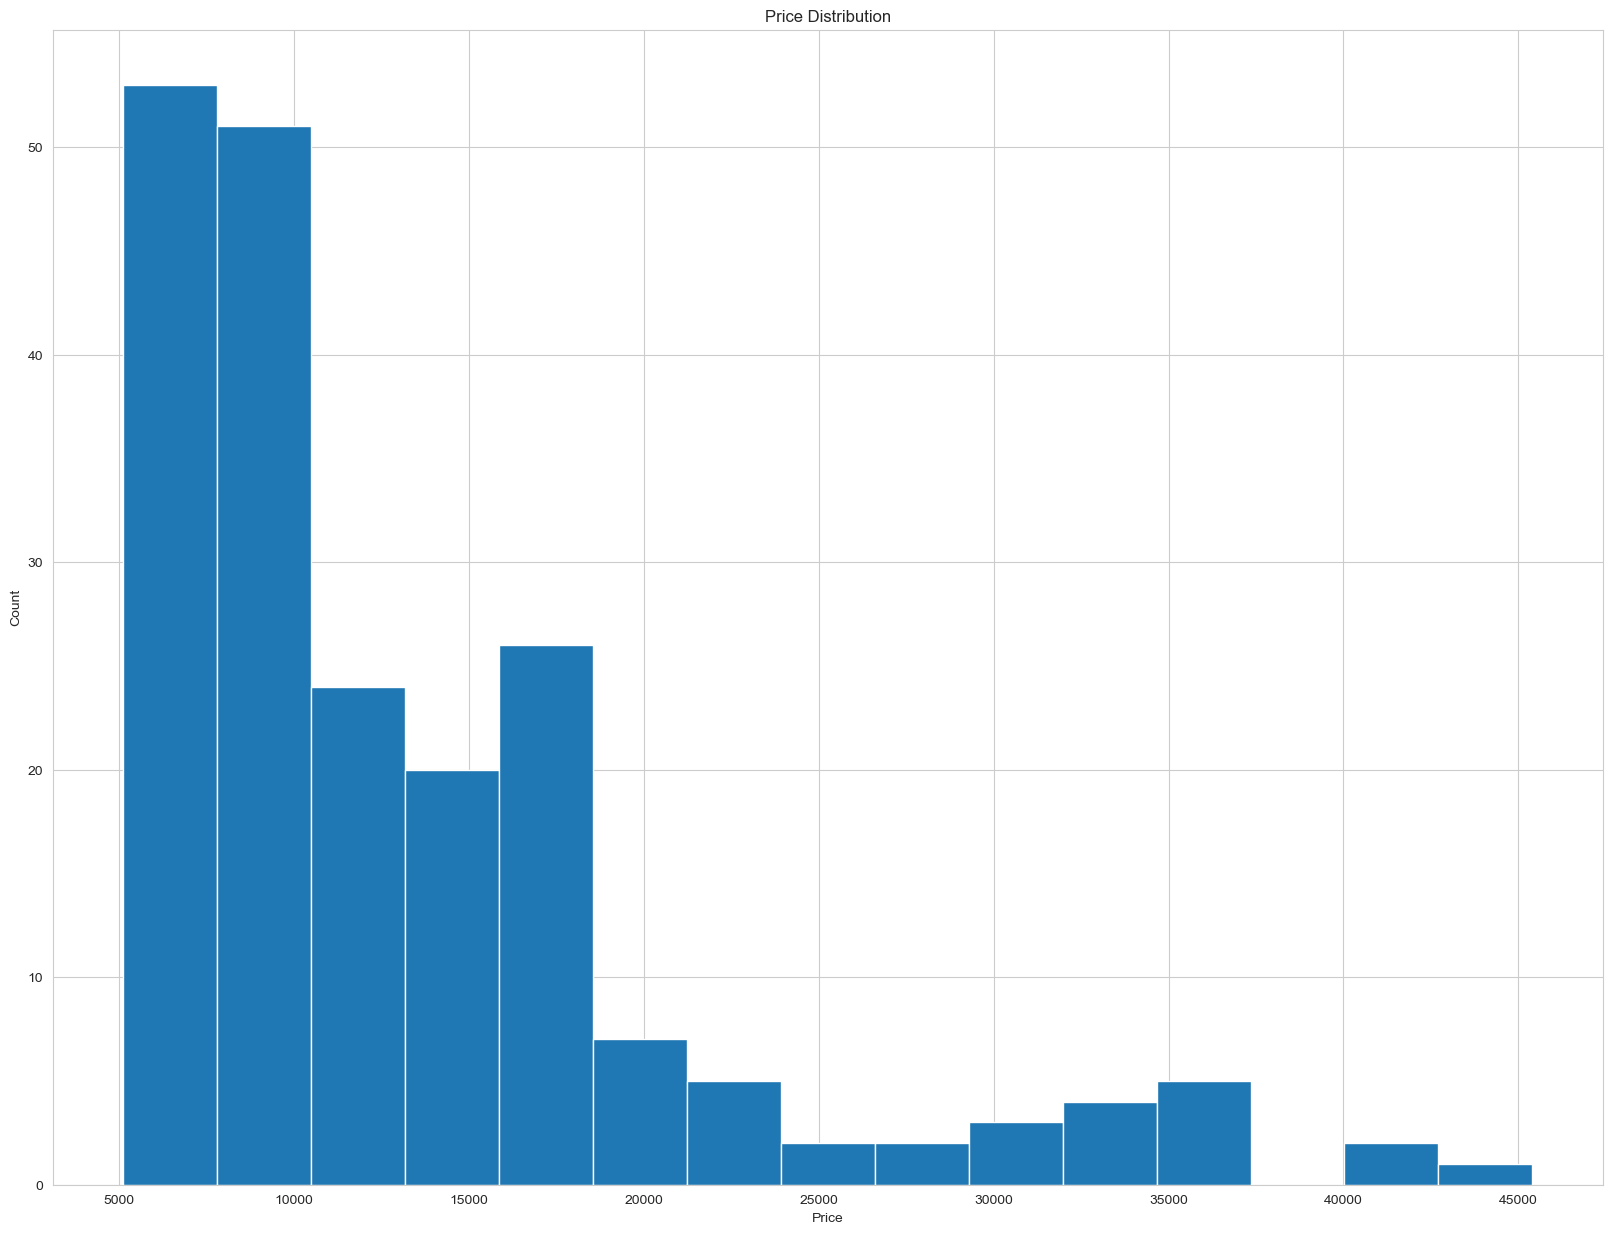

In [45]:
plt.hist(cars['price'], bins=15)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')

<AxesSubplot:>

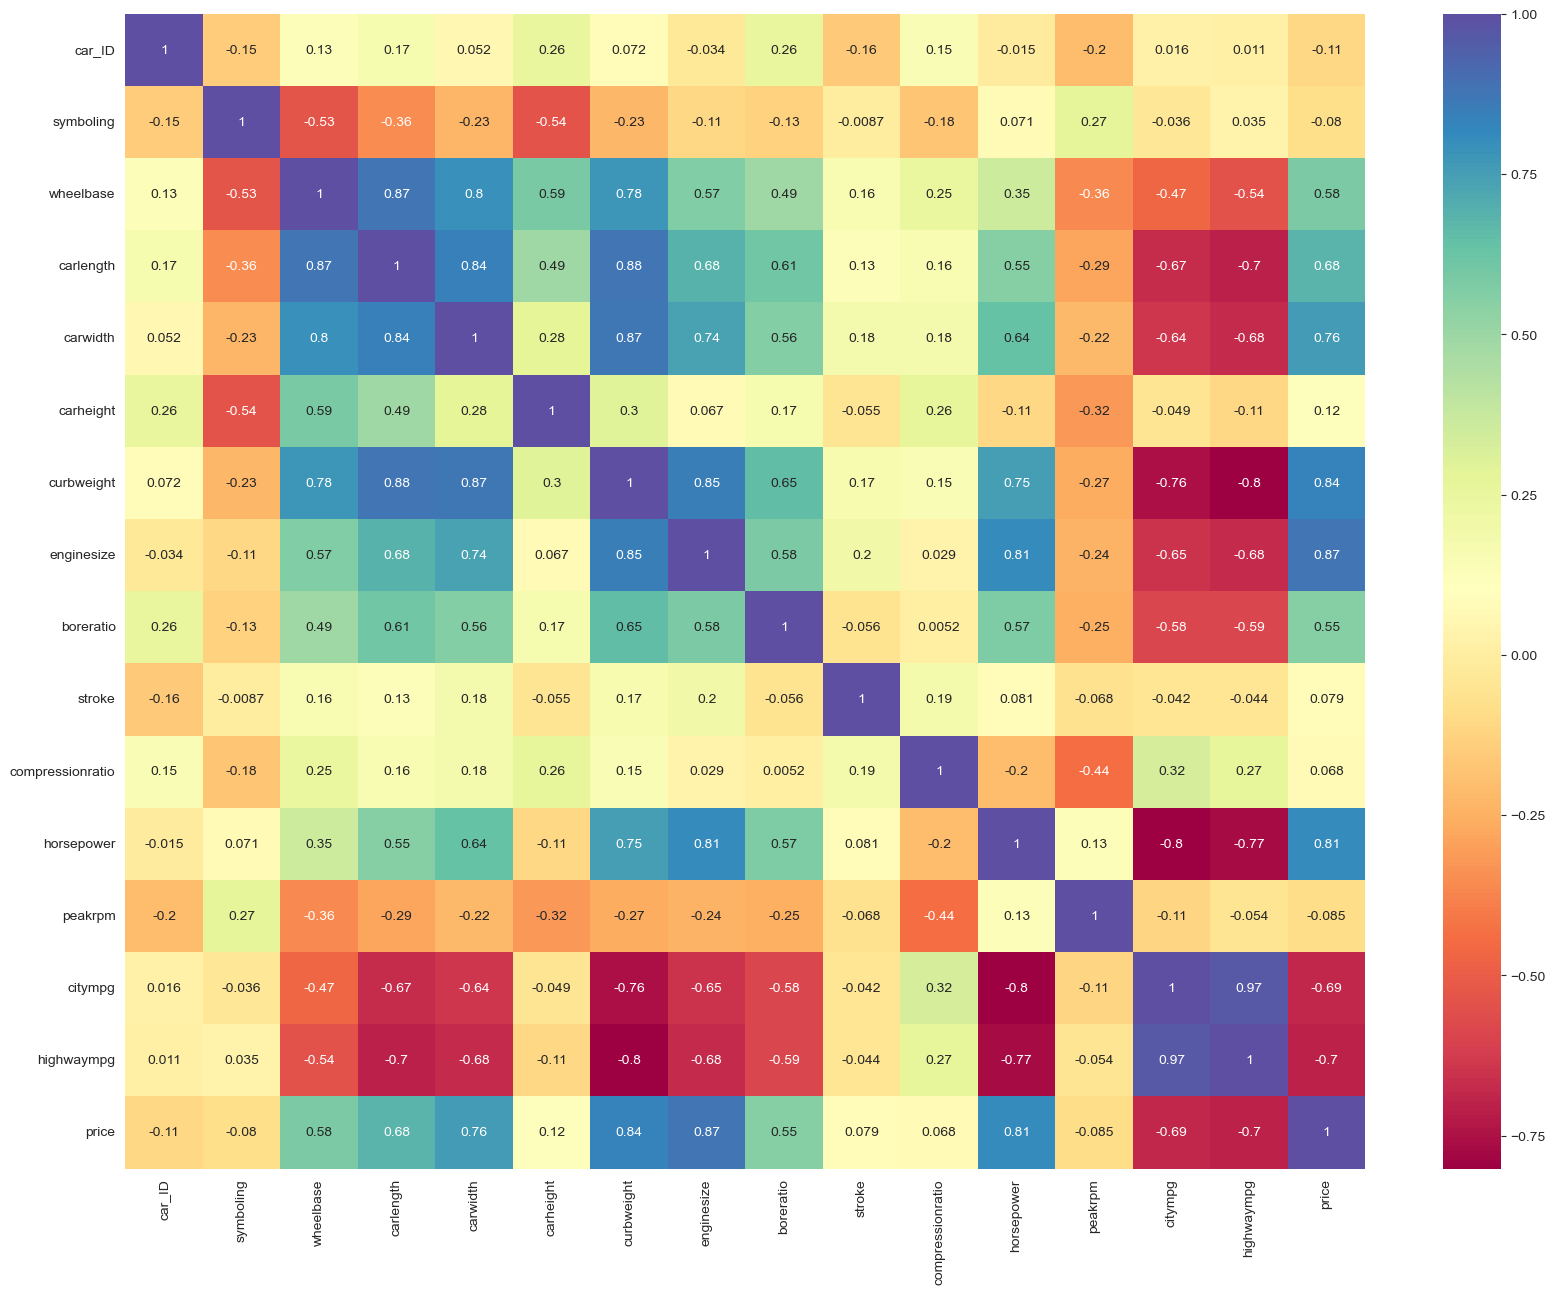

In [46]:
corr = cars.corr('pearson')
sns.heatmap(corr, cmap='Spectral', annot=True)

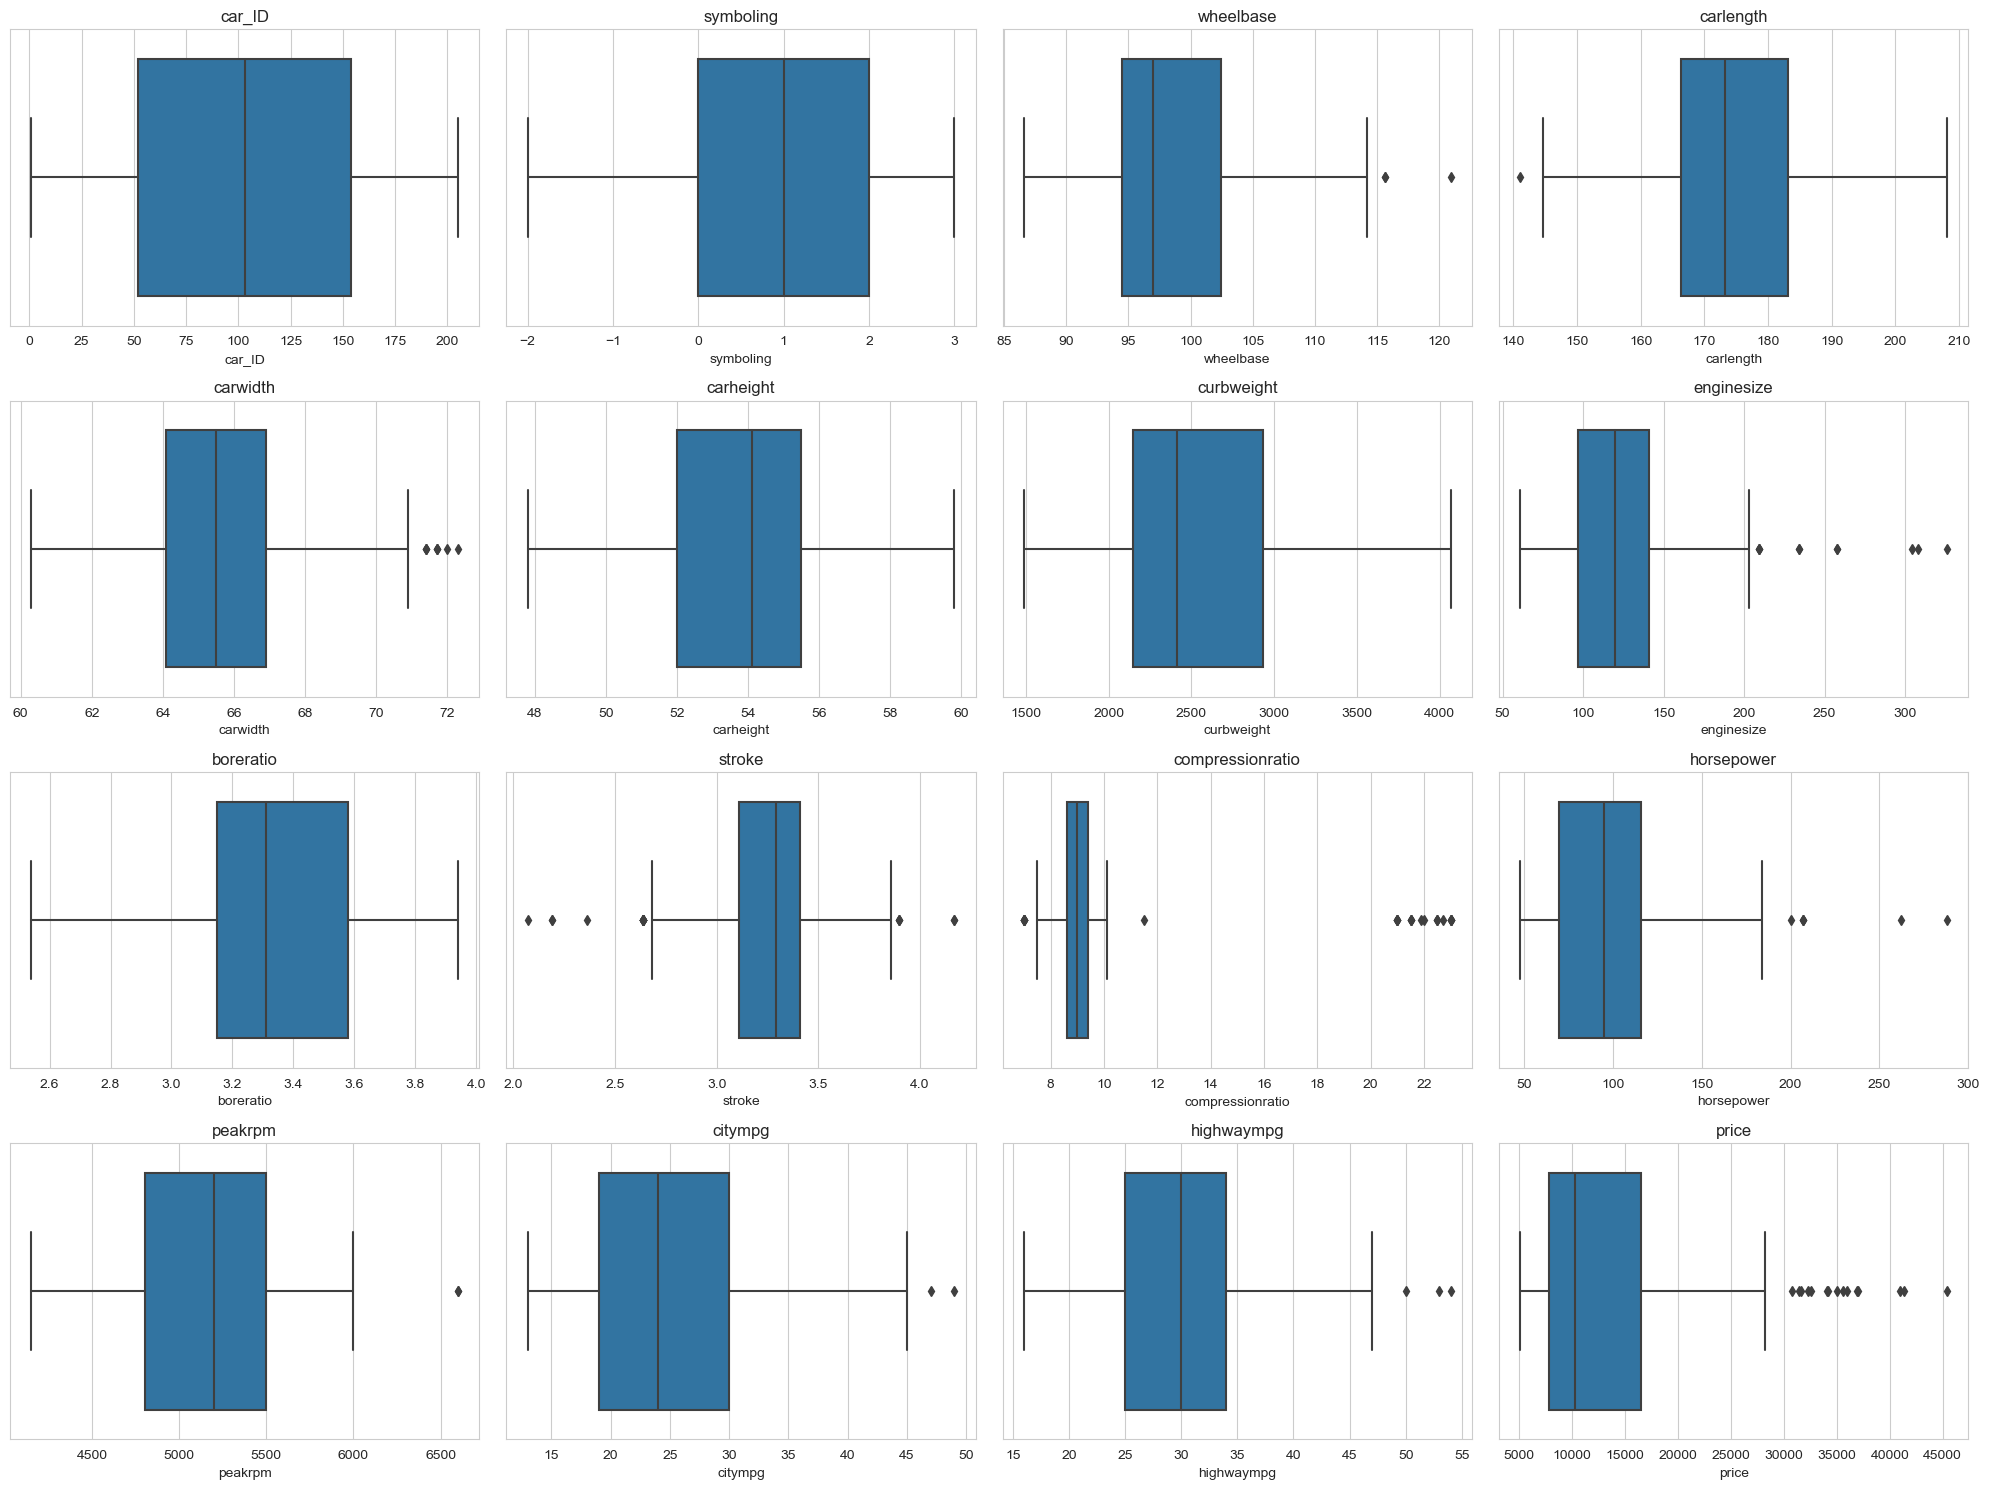

In [47]:
Cars = cars.drop(objects.columns, axis = 1)
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (20,15))

for i, column in enumerate(Cars.columns):
    row = i // 4
    col = i % 4
    sns.boxplot(x=Cars[column], ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout()
plt.show()

In [48]:
for column in objects.columns:
    print(len(objects[column].unique()), column)


147 CarName
2 fueltype
2 aspiration
2 doornumber
5 carbody
3 drivewheel
2 enginelocation
7 enginetype
7 cylindernumber
8 fuelsystem


In [49]:
cars = cars.drop(['CarName', 'car_ID'], axis = 1)
objects = objects.drop('CarName', axis = 1)
print(objects.columns)

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')


In [50]:
X = cars.loc[:, cars.columns != 'price']
y = cars['price']

In [51]:
# Ordinal Encode these Categorical columns
ordinal = OrdinalEncoder()

x = ordinal.fit_transform(cars.loc[:, objects.columns])

In [52]:
# Split for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((164, 9), (41, 9), (164,), (41,))

In [53]:
# Scale Data
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)


In [117]:
# Linear Regression
np.random.seed(42)
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [118]:
# Evaluate the Model
y_pred = lr.predict(x_test)
print(f"Predicted Values:{np.round(y_pred[0:5], 2)}")
print(f"Test Values:{np.round([y_test[0:5]], 2)}")

Predicted Values:[19106.71  7998.89  9319.14 12286.15 19204.06]
Test Values:[[30760.   17859.17  9549.   11850.   28248.  ]]


In [119]:
# Evaluation Metrics for the Model
print(f"R-squared for test data: {r2_score(y_test, y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Mean Absolut Error: {mean_absolute_error(y_test, y_pred)}")

R-squared for test data: 0.46196187586555526
Root Mean Squared Error: 6517.276494496873
Mean Absolut Error: 4419.887135216614


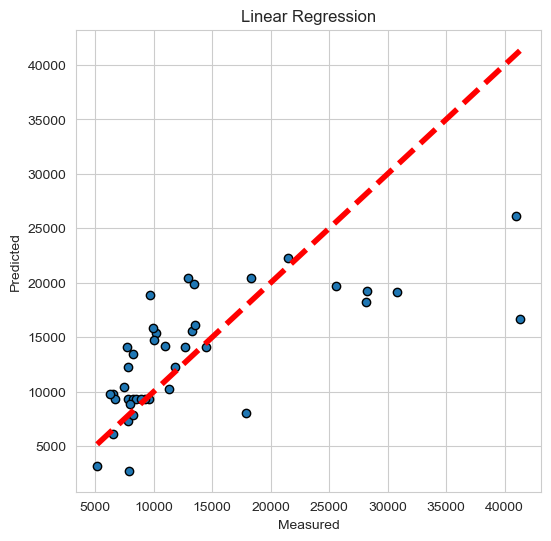

In [120]:
# Graphical Representation of True and Observed for Test Data
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
ax.set_title('Linear Regression')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [121]:
# XGB Regressor
np.random.seed(42)
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [122]:
# Evaluate the Model
pred = xgb.predict(x_test)
print(f"Predicted Values:{np.round(pred[0:5], 2)}")
print(f"Test Values:{np.round([y_test[0:5]], 2)}")

Predicted Values:[14635.63 17526.56  8257.75  9097.34 30431.34]
Test Values:[[30760.   17859.17  9549.   11850.   28248.  ]]


In [123]:
# Evaluation Metrics for the Model
print(f"R-squared for test data: {r2_score(y_test, pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred))}")
print(f"Mean Absolut Error: {mean_absolute_error(y_test, pred)}")

R-squared for test data: 0.5421260037581723
Root Mean Squared Error: 6012.188812701006
Mean Absolut Error: 3303.9342846798786


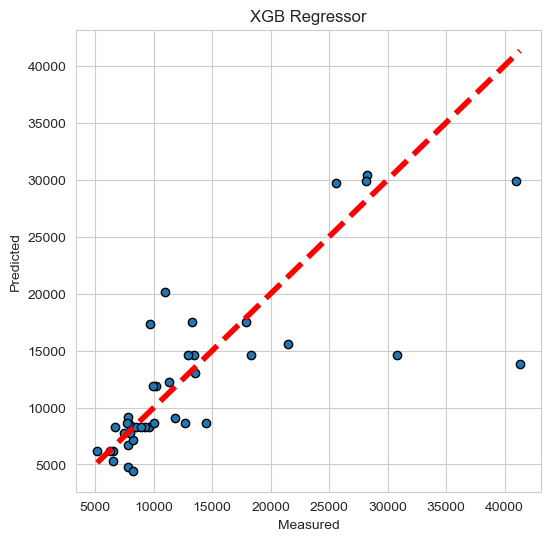

In [124]:
# Graphical Representation of True and Observed for Test Data
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
ax.scatter(y_test, pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
ax.set_title('XGB Regressor')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [125]:
# Decision Tree Regressor
np.random.seed(42)
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [126]:
# Evaluate the Model
y_p = tree.predict(x_test)
print(f"Predicted Values:{np.round(y_p[0:5], 2)}")
print(f"Test Values:{np.round([y_test[0:5]], 2)}")

Predicted Values:[27516.67 23875.    7402.75 11638.33 31600.  ]
Test Values:[[30760.   17859.17  9549.   11850.   28248.  ]]


In [127]:
# Evaluation Metrics for the Model
print(f"R-squared for test data: {r2_score(y_test, y_p)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_p))}")
print(f"Mean Absolut Error: {mean_absolute_error(y_test, y_p)}")

R-squared for test data: 0.6922258990616996
Root Mean Squared Error: 4929.1911152531975
Mean Absolut Error: 2845.9528373983735


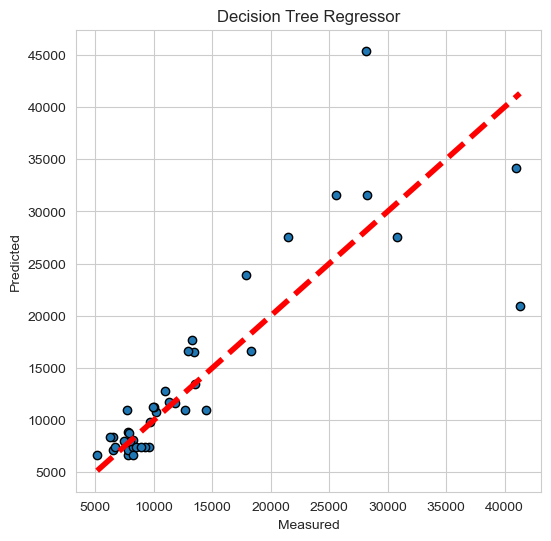

In [128]:
# Graphical Representation of True and Observed for Test Data
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
ax.scatter(y_test, y_p, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
ax.set_title('Decision Tree Regressor')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [129]:
# Random Forest Regressor
np.random.seed(42)
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

RandomForestRegressor()

In [130]:
# Evaluate the Model
predict = forest.predict(x_test)
print(f"Predicted Values:{np.round(predict[0:5], 2)}")
print(f"Test Values:{np.round([y_test[0:5]], 2)}")

Predicted Values:[26698.92 20235.31  7390.14 11262.49 26958.76]
Test Values:[[30760.   17859.17  9549.   11850.   28248.  ]]


In [131]:
# Evaluation Metrics for the Model
print(f"R-squared for test data: {r2_score(y_test, predict)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, predict))}")
print(f"Mean Absolut Error: {mean_absolute_error(y_test, predict)}")

R-squared for test data: 0.8182291749241533
Root Mean Squared Error: 3788.102402272178
Mean Absolut Error: 2320.5057383666276


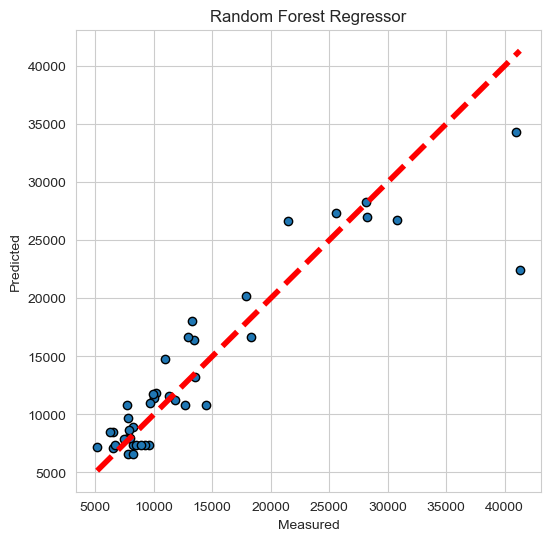

In [132]:
# Graphical Representation of True and Observed for Test Data
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
ax.scatter(y_test, predict, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
ax.set_title('Random Forest Regressor')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

From the four models above, we can see that the Random Forest Regressor performed the best with the highest R2 value as well as the lowest RMSE and MAE.

I will now implement cross-validation to tune parameters to further improve the predictive capabilities of the models.

In [145]:
# Cross Validation of Random Forest Regressor
parameter_space = {
    'max_depth': [5, 6, 7, 8, 9, 10],
}

forest_gsc = GridSearchCV(forest, parameter_space, n_jobs=-1, cv=3)
forest_gsc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10]})

In [146]:
# Determining best parameters
np.random.seed(42)
print("New Score: ", forest_gsc.best_score_)
print("New Parameters: ", forest_gsc.best_params_)

New Score:  0.6911352589451744
New Parameters:  {'max_depth': 9}


In [150]:
# Best Model

best_forest = RandomForestRegressor(max_depth=5)
best_forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=5)

In [151]:
# Evaluate the Model
best_pred = best_forest.predict(x_test)
print(f"Predicted Values:{np.round(best_pred[0:5], 2)}")
print(f"Test Values:{np.round([y_test[0:5]], 2)}")

Predicted Values:[25863.74 21340.16  7690.87 10847.78 26002.37]
Test Values:[[30760.   17859.17  9549.   11850.   28248.  ]]


In [152]:
# Evaluation Metrics for the Model
print(f"R-squared for test data: {r2_score(y_test, best_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, best_pred))}")
print(f"Mean Absolut Error: {mean_absolute_error(y_test, best_pred)}")

R-squared for test data: 0.8330478464900022
Root Mean Squared Error: 3630.409659060129
Mean Absolut Error: 2352.4190199993063


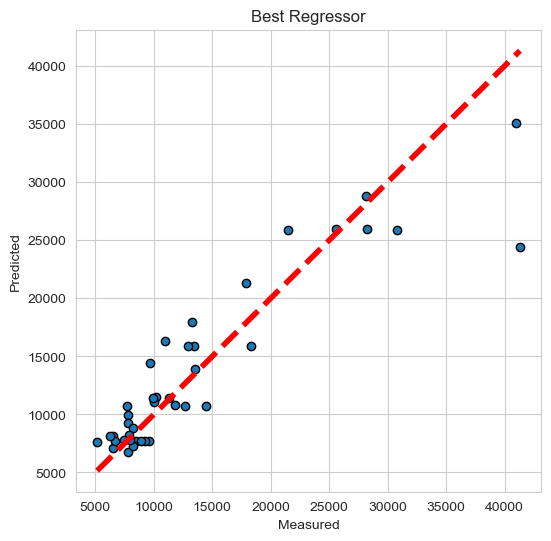

In [153]:
# Graphical Representation of True and Observed for Test Data
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
ax.scatter(y_test, best_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
ax.set_title('Best Regressor')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

With some hyperparameter tuning we can see a slight improvement in the R2 value and thus a better regression model for the data. Considering how large the data is and the complexity, an R2 value of 0.833 is good.